Breast cancer

In [59]:
# Importing libraries

import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [60]:
#Diagnosis (malignant (cancerous) or benign (non-cancerous))
df = pd.read_csv(r'C:\Users\Pranshu Saini\Desktop\disease-prediction-main\docpat\datasets\breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [61]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [62]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [63]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [64]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [65]:
# checking for null values

df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [66]:
# removing highly correlated features

corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")
print(df)


The reduced dataframe has 23 columns.
     diagnosis  texture_mean  smoothness_mean  compactness_mean  \
0            1         10.38          0.11840           0.27760   
1            1         17.77          0.08474           0.07864   
2            1         21.25          0.10960           0.15990   
3            1         20.38          0.14250           0.28390   
4            1         14.34          0.10030           0.13280   
..         ...           ...              ...               ...   
564          1         22.39          0.11100           0.11590   
565          1         28.25          0.09780           0.10340   
566          1         28.08          0.08455           0.10230   
567          1         29.33          0.11780           0.27700   
568          0         24.54          0.05263           0.04362   

     concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0                0.14710         0.2419                 0.07871      0.9053   

In [57]:
# Filter rows where diagnosis == 1
filtered_df = df[df['diagnosis'] == 1]

# Select the first row and convert it to a list
if not filtered_df.empty:  # Ensure there is at least one matching row
    first_row_values = filtered_df.iloc[0].tolist()
    print(first_row_values)
else:
    print("No rows with diagnosis == 1")
print(len(first_row_values))

[1.0, 10.38, 0.1184, 0.2776, 0.1471, 0.2419, 0.07871, 0.9053, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 17.33, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]
23


In [67]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   texture_mean             569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   concave points_mean      569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   texture_se               569 non-null    float64
 8   area_se                  569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  compactness_se           569 non-null    float64
 11  concavity_se             569 non-null    float64
 12  concave points_se        569 non-null    float64
 13  symmetry_se              569 non-null    float64
 14  fractal_dimension_se     5

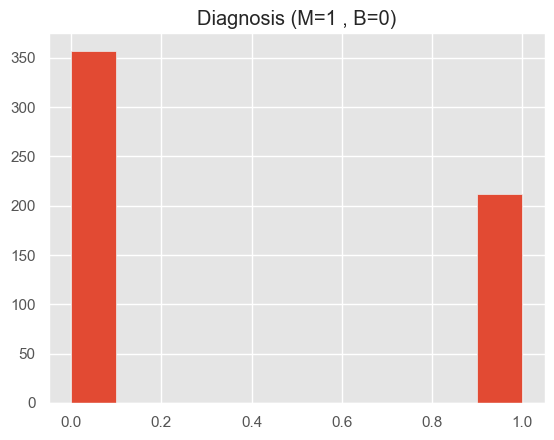

In [13]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [14]:
# creating features and label 

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']
print(X.shape)

(569, 22)


In [15]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [16]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
#Logistic Regression

In [18]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [19]:
# model predictions

y_pred = log_reg.predict(X_test)

In [20]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

# confusion matrix

print(confusion_matrix(y_test, y_pred))

# classification report

print(classification_report(y_test, y_pred))

0.9899497487437185
0.9590643274853801
[[106   2]
 [  5  58]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [21]:
#K Neighbors Classifier (KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# model predictions 

y_pred = knn.predict(X_test)

In [24]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9623115577889447
0.935672514619883


In [25]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[105   3]
 [  8  55]]


In [26]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



In [27]:
#Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [29]:
# best parameters

grid_search.best_params_

# best score 

grid_search.best_score_

0.9774683544303798

In [30]:
svc = SVC(C = 10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01, probability=True)

In [31]:
# model predictions 

y_pred = svc.predict(X_test)

In [32]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

# confusion matrix

print(confusion_matrix(y_test, y_pred))

# classification report

print(classification_report(y_test, y_pred))

0.9874371859296482
0.9766081871345029
[[107   1]
 [  3  60]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [33]:
#Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [35]:
# best parameters

grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [36]:
# best score

grid_search_dt.best_score_

0.9623734177215189

In [37]:
dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 19, min_samples_leaf= 4, min_samples_split= 6, splitter= 'random')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=4,
                       min_samples_split=6, splitter='random')

In [38]:
y_pred = dtc.predict(X_test)

In [39]:
# accuracy score

print(accuracy_score(y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

# confusion matrix

print(confusion_matrix(y_test, y_pred))

# classification report

print(classification_report(y_test, y_pred))

0.9673366834170855
0.9298245614035088
[[100   8]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       108
           1       0.88      0.94      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [40]:
#Model Comparison

In [41]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVM,97.66
0,Logistic Regression,95.91
1,KNN,93.57
3,Decision Tree Classifier,92.98


In [56]:
from sklearn.linear_model import LogisticRegression
input_data =(10.38, 0.1184, 0.2776, 0.1471, 0.2419, 0.07871, 0.9053, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 17.33, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189
)
#100,12,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1) 

'''(14.36,0.09779,0.08129,0.04781,0.1885,0.05766,0.7886,23.56,0.008462,
0.0146,0.02387,0.01315,0.0198,0.0023,15.11,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259
)'''

from sklearn import svm
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
model = LogisticRegression()
model.fit(X_test, y_test)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
predictions = model.predict(input_data_reshaped)
print(predictions)
if (predictions == 0):
  print('B')
else:
  print('M')

[1]
M


Model: LR
Mean Accuracy: 95.91%
Mean ROC AUC: 99.37%
------------------------------
Model: DT
Mean Accuracy: 92.98%
Mean ROC AUC: 95.06%
------------------------------
Model: SVM
Mean Accuracy: 97.66%
Mean ROC AUC: 99.81%
------------------------------
Model: KNN
Mean Accuracy: 93.57%
Mean ROC AUC: 97.02%
------------------------------


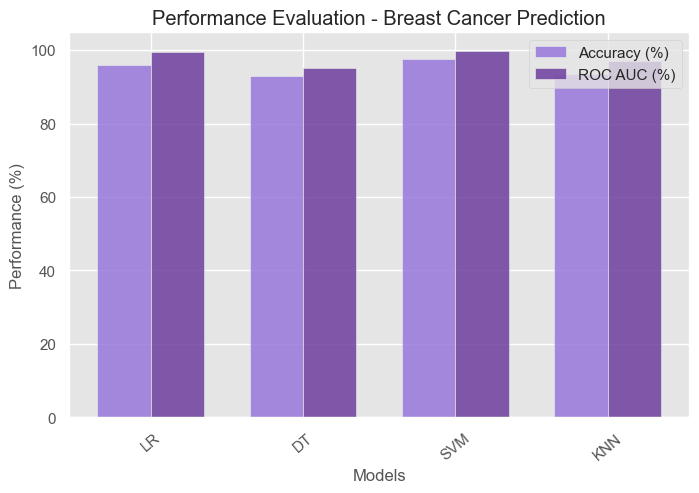

In [43]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Define models with labels
models = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'DT', 'model': dtc},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn}
]

# Performance metrics
means_roc = []
means_accuracy = []

# Evaluate each model
for m in models:
    model = m['model']
    label = m['label']
    
    # Calculate predictions and probabilities
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None
    
    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    mean_accuracy = 100 * round(accuracy, 4)
    means_accuracy.append(mean_accuracy)
    
    # Calculate ROC AUC
    if y_pred_prob is not None:
        auc = metrics.roc_auc_score(y_test, y_pred_prob)
        mean_roc = 100 * round(auc, 4)
    else:
        mean_roc = np.nan  # Append NaN if predict_proba is not available
    
    means_roc.append(mean_roc)
    
    # Display mean accuracy and mean ROC for each model
    print(f"Model: {label}")
    print(f"Mean Accuracy: {mean_accuracy:.2f}%")
    print(f"Mean ROC AUC: {mean_roc:.2f}%")
    print("-" * 30)

# Plotting
index = np.arange(len(models))
bar_width = 0.35

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

rects1 = plt.bar(index, means_accuracy, bar_width, alpha=0.8, color='mediumpurple', label='Accuracy (%)')
rects2 = plt.bar(index + bar_width, means_roc, bar_width, alpha=0.8, color='rebeccapurple', label='ROC AUC (%)')

# Labeling
ax.set_xlabel('Models')
ax.set_ylabel('Performance (%)')
ax.set_title('Performance Evaluation - Breast Cancer Prediction')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([m['label'] for m in models], rotation=40, ha='center')
ax.legend()

# Display plot
plt.show()


In [58]:

import pickle
model = log_reg
filename = r'C:\Users\Pranshu Saini\Desktop\disease-prediction-main\docpat\model\breast_cancer_svm_model.pkl'
pickle.dump(model, open(filename,'wb'))

In [ ]:
'''import pickle
def load_model(path):
    with open(path, 'rb') as file:
        model = pickle.load(file)
    return model
breast_cancer_model = load_model(r'C:\Users\DELL\Desktop\app\breast_cancer.pkl')
def predict(inputs):
    return breast_cancer_model.predict(inputs)'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 159-160: truncated \UXXXXXXXX escape (1223555901.py, line 8)